In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

In [ ]:
##Mapping the Data
train_dir = '/content/drive/MyDrive/CNN/Assigment/Skin cancer ISIC The International Skin Imaging Collaboration/Train'
test_dir = '/content/drive/MyDrive/CNN/Assigment/Skin cancer ISIC The International Skin Imaging Collaboration/Test'

# Creating Dataset

In [ ]:

batch_size = 32
img_size = (180, 180)

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)


Found 1795 images belonging to 9 classes.
Found 444 images belonging to 9 classes.
Found 118 images belonging to 9 classes.


# Visualize the data

Processed image for class: actinic keratosis
Processed image for class: nevus
Processed image for class: melanoma
Processed image for class: seborrheic keratosis
Processed image for class: seborrheic keratosis
Processed image for class: actinic keratosis
Processed image for class: pigmented benign keratosis
Processed image for class: actinic keratosis
Processed image for class: pigmented benign keratosis
Processed image for class: pigmented benign keratosis
Processed image for class: squamous cell carcinoma
Processed image for class: nevus
Processed image for class: basal cell carcinoma
Processed image for class: basal cell carcinoma
Processed image for class: nevus
Processed image for class: melanoma
Processed image for class: melanoma
Processed image for class: squamous cell carcinoma
Processed image for class: basal cell carcinoma
Processed image for class: pigmented benign keratosis
Processed image for class: vascular lesion
Processed image for class: melanoma
Processed image for c

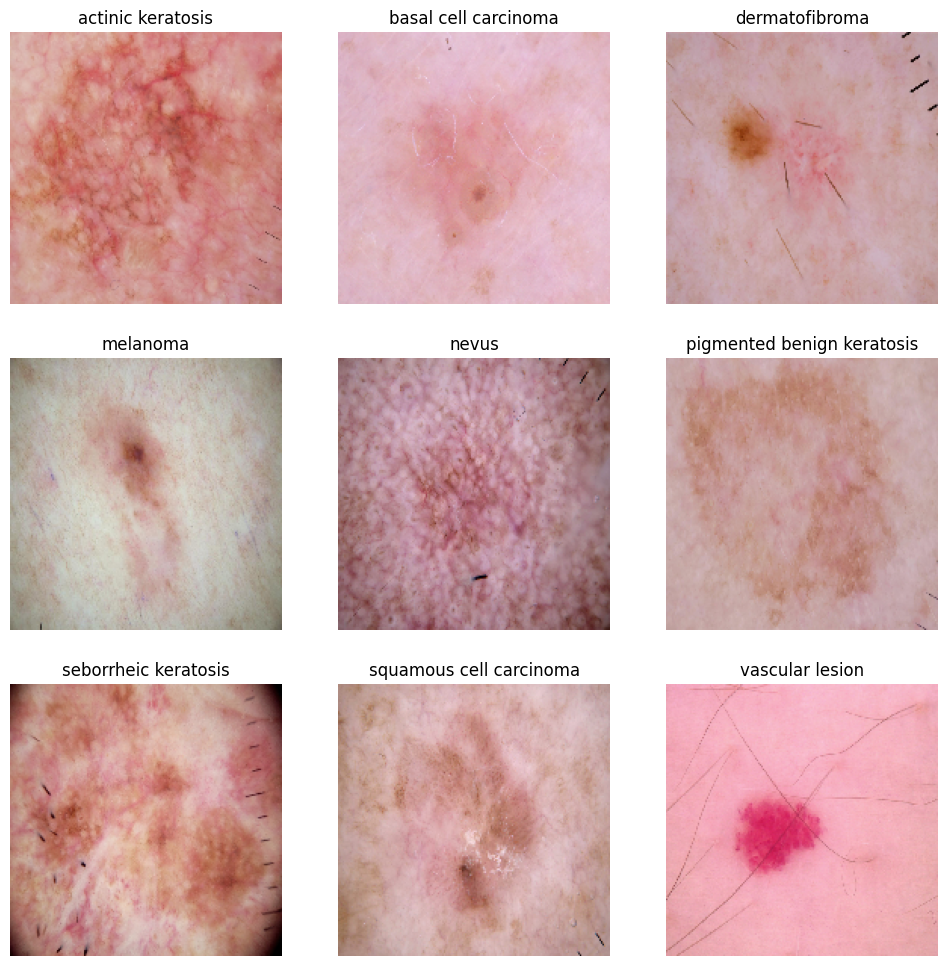

In [ ]:
#Fetching class details
class_names = list(train_generator.class_indices.keys())
class_indices = train_generator.class_indices

#Initialize a dictionary to store 1 image per class
images_per_class = {class_name: None for class_name in class_names}

#Iterate until we have 1 image for each class
for images, labels in train_generator:
    for img, label in zip(images, labels):
        class_index = tf.argmax(label).numpy()
        class_name = class_names[class_index]
        if images_per_class[class_name] is None:
            images_per_class[class_name] = img
        #output
        print(f"Processed image for class: {class_name}")
    #Check if we have found one image for each class
    if all(value is not None for value in images_per_class.values()):
        break

#Plot the images
plt.figure(figsize=(12, 12))
for i, (class_name, img) in enumerate(images_per_class.items()):
    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.title(class_name)
    plt.axis('off')
plt.show()


In [ ]:
#Model Building & Training
#Initial Model

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(9, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Compile the Model

In [ ]:

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Train the model

In [ ]:

history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1164s 20s/step - accuracy: 0.1841 - loss: 2.3663 - val_accuracy: 0.3266 - val_loss: 1.8715
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 30s 536ms/step - accuracy: 0.3840 - loss: 1.7409 - val_accuracy: 0.3964 - val_loss: 1.6591
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 32s 559ms/step - accuracy: 0.4506 - loss: 1.5806 - val_accuracy: 0.4189 - val_loss: 1.9484
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 42s 572ms/step - accuracy: 0.4983 - loss: 1.4736 - val_accuracy: 0.3964 - val_loss: 1.9195
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 31s 547ms/step - accuracy: 0.5080 - loss: 1.4017 - val_accuracy: 0.4752 - val_loss: 1.8314
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 32s 560ms/step - accuracy: 0.5723 - loss: 1.2788 - val_accuracy: 0.4324 - val_loss: 1.8634
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 35s 612ms/step - accuracy: 0.5429 - loss: 1.2910 - val_accuracy: 0.4640 - val_loss: 1.6905
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 31s 551ms/step - accuracy: 0.5845 - loss: 1.1900 - val_accu

# Visualize the Training result

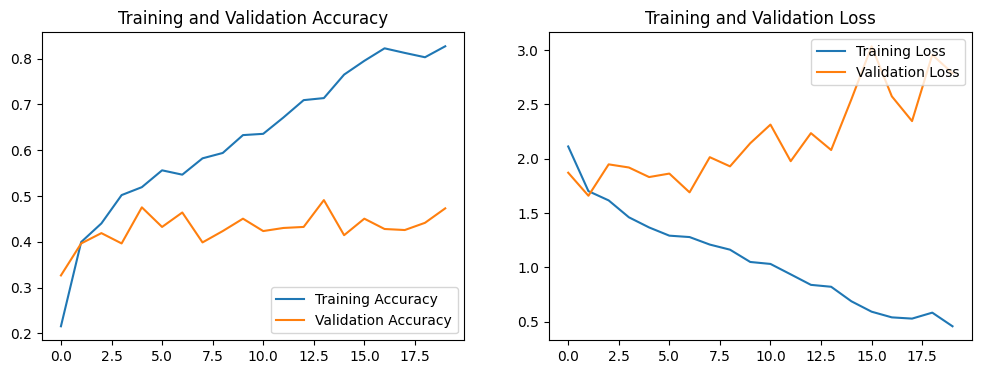

In [ ]:
#Analyze the Model Fit

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

#Plotting for Training and Validation Accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#Plotting for Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


##### Class Distribution in Training Dataset

In [ ]:
import numpy as np
class_counts = {class_name: 0 for class_name in class_names}
for _, labels in train_generator:
    labels = np.argmax(labels, axis=1)
    for label in labels:
        class_counts[class_names[label]] += 1
    if sum(class_counts.values()) >= train_generator.samples:
        break

#Distribution
print("Class distribution in the training dataset:")
for class_name, count in class_counts.items():
    print(f"{class_name}: {count}")

least_samples_class = min(class_counts, key=class_counts.get)
most_samples_class = max(class_counts, key=class_counts.get)

#Display details
print(f"\nClass with the least number of samples: {least_samples_class}")
print(f"Class that dominates the data: {most_samples_class}")


Class distribution in the training dataset:
actinic keratosis: 90
basal cell carcinoma: 300
dermatofibroma: 77
melanoma: 349
nevus: 288
pigmented benign keratosis: 372
seborrheic keratosis: 61
squamous cell carcinoma: 144
vascular lesion: 114

Class with the least number of samples: seborrheic keratosis
Class that dominates the data: pigmented benign keratosis


##### Initial train count

In [ ]:
import os

#Function to count initial images
def count_initial_images(dir_path, class_names):
    class_counts = {}
    for class_name in class_names:
        class_dir = os.path.join(dir_path, class_name)
        if os.path.exists(class_dir):
            class_counts[class_name] = len(os.listdir(class_dir))
        else:
            class_counts[class_name] = 0
    return class_counts


#Count initial images for all in train directory
initial_train_counts = count_initial_images(train_dir, class_names)
print("Initial train counts:", initial_train_counts)


Initial train counts: {'actinic keratosis': 114, 'basal cell carcinoma': 376, 'dermatofibroma': 95, 'melanoma': 438, 'nevus': 357, 'pigmented benign keratosis': 462, 'seborrheic keratosis': 77, 'squamous cell carcinoma': 181, 'vascular lesion': 139}


##### Additional samples needed

In [ ]:
#Desired number of samples per class
required_samples_per_class = 1000

#Calculate additional samples needed for each class
additional_samples_needed = {
    class_name: max(0, required_samples_per_class - count)
    for class_name, count in initial_train_counts.items()
}
print("Additional samples needed:", additional_samples_needed)


Additional samples needed: {'actinic keratosis': 886, 'basal cell carcinoma': 624, 'dermatofibroma': 905, 'melanoma': 562, 'nevus': 643, 'pigmented benign keratosis': 538, 'seborrheic keratosis': 923, 'squamous cell carcinoma': 819, 'vascular lesion': 861}


In [ ]:
# Installing Augmentor class
!pip install Augmentor

#### Rectifyin the class imbalance with Data augmentation

In [ ]:
import Augmentor

# Function to apply augmentation proportionally
def apply_augmentation_proportional(dir_path, num_samples):
    p = Augmentor.Pipeline(dir_path)
    p.zoom(probability=0.5, min_factor=1.1, max_factor=1.2)
    p.sample(num_samples)  # Number of samples to generate

# Apply augmentation to all classes in train directory
for class_name, num_samples in additional_samples_needed.items():
    train_class_dir = os.path.join(train_dir, class_name)
    if os.path.exists(train_class_dir) and num_samples > 0:
        apply_augmentation_proportional(train_class_dir, num_samples)
    else:
        print(f"Warning: Train class directory {train_class_dir} does not exist or no additional samples needed.")


Initialised with 114 image(s) found.
Output directory set to /content/drive/MyDrive/CNN/Assigment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7903119BB4D0>: 100%|██████████| 886/886 [00:29<00:00, 30.27 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/drive/MyDrive/CNN/Assigment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x79032FFDBE90>: 100%|██████████| 624/624 [00:15<00:00, 39.80 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/drive/MyDrive/CNN/Assigment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x790347113390>: 100%|██████████| 905/905 [00:24<00:00, 36.65 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/drive/MyDrive/CNN/Assigment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x790311905A50>: 100%|██████████| 562/562 [00:38<00:00, 14.47 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/drive/MyDrive/CNN/Assigment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7903119D6690>: 100%|██████████| 643/643 [00:39<00:00, 16.47 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/drive/MyDrive/CNN/Assigment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x790417CA7F10>: 100%|██████████| 538/538 [00:13<00:00, 40.96 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/drive/MyDrive/CNN/Assigment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7903119BB2D0>: 100%|██████████| 923/923 [00:29<00:00, 31.07 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/drive/MyDrive/CNN/Assigment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x79032FFA9F50>: 100%|██████████| 819/819 [00:18<00:00, 45.27 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/drive/MyDrive/CNN/Assigment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x79030093CE90>: 100%|██████████| 861/861 [00:21<00:00, 40.38 Samples/s]


##### Applying augmentation strategy

In [ ]:
#(without additional augmentation since Augmentor has been used)
#Ensure to have a validation split
train_datagen_augmented = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)

#Create generators for augmented data -  This should now include augmented images
train_generator_augmented = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size=(180, 180),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

#This should now include augmented images
validation_generator_augmented = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size=(180, 180),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)
 #Test directory, typically without augmentation
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(180, 180),
    batch_size=32,
    class_mode='categorical'
)



Found 7200 images belonging to 9 classes.
Found 1800 images belonging to 9 classes.
Found 118 images belonging to 9 classes.


#### Model Building & training on the rectified class imbalance data

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

#Define the model
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(180, 180, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(512, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(1024, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(9, activation='softmax')
])

#Compile the model
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

#Train the model
history = model.fit(
    train_generator_augmented,
    epochs=30,
    validation_data=validation_generator_augmented
)


Epoch 1/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 113s 430ms/step - accuracy: 0.3660 - loss: 2.1896 - val_accuracy: 0.1117 - val_loss: 4.3227
Epoch 2/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 89s 396ms/step - accuracy: 0.5420 - loss: 1.4711 - val_accuracy: 0.2644 - val_loss: 2.6195
Epoch 3/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 84s 374ms/step - accuracy: 0.6379 - loss: 1.0828 - val_accuracy: 0.5472 - val_loss: 1.5074
Epoch 4/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 83s 368ms/step - accuracy: 0.7174 - loss: 0.8375 - val_accuracy: 0.6733 - val_loss: 0.9750
Epoch 5/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 140s 360ms/step - accuracy: 0.7740 - loss: 0.6626 - val_accuracy: 0.7594 - val_loss: 0.7162
Epoch 6/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 82s 366ms/step - accuracy: 0.8001 - loss: 0.5943 - val_accuracy: 0.7111 - val_loss: 0.8504
Epoch 7/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 82s 365ms/step - accuracy: 0.8452 - loss: 0.4567 - val_accuracy: 0.7094 - val_loss: 0.8408
Epoch 8/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 81s 361ms/step - accuracy: 0.8662 - loss:

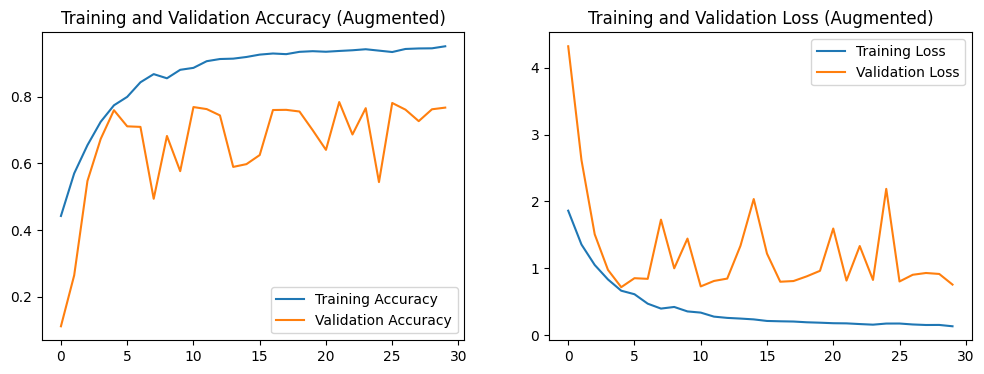

In [ ]:
#Accuracy and Loss History Values
acc_aug = history.history['accuracy']
val_acc_aug = history.history['val_accuracy']
loss_aug = history.history['loss']
val_loss_aug = history.history['val_loss']

#Plot for Training and Validation Accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(acc_aug, label='Training Accuracy')
plt.plot(val_acc_aug, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy (Augmented)')

#Plot for Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(loss_aug, label='Training Loss')
plt.plot(val_loss_aug, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss (Augmented)')
plt.show()


#**Observations**

**Training Accuracy:** Initially low, it steadily improved, accuracy peaking at 25 epochs with 95.42%, however at with 30th epoch achieving approximately 93.80%.

**Validation Accuracy:** Showed improvement, with a high of about 80.11% at the end.

----

#**Recommendations:**

**Early Stopping:** Use early stopping to prevent overtraining by stopping when validation performance no longer improves.

**Learning Rate Adjustment:** If there are signs of instability, consider lowering the learning rate.

**Data Augmentation:** Increase the variety of data augmentation techniques to enhance model generalization.
  
**Regularization Techniques:**

 **1. Dropout Layers:** Fine-tune dropout rates to combat overfitting.

 **2. L2 Regularization:** Implement L2 regularization on both convolutional and dense layers.